# Decision Trees - Comparing improvment in College respect to High School times

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [2]:
df = pd.read_parquet('CLEANED_SWIM_DATA.parquet')

In [3]:
df.loc[:,'isHS'] = df.loc[:,'Division'] == 'HS'

In [4]:
df.head(5)

,Event,Conf_Rank,Time,Name,School,Standard,Date,Gender,Division,Season,...,Time_Adj,Time_Sec,Div_Rank,NCAA_Rank,ID,Power_Tot,Power,Record,Points,isHS
0,50 Freestyle SCY Male,-1,21.22,Ben Beldner,Binghamton,NA,2000-01-01,M,HS,00_01,...,0 days 00:00:21.220000,21.22,-1,-1,394588,22.71,20.52,17.63,573.483330,True
1,50 Freestyle SCY Male,-1,20.87,Justin Meyn,Binghamton,NA,2000-01-01,M,HS,00_01,...,0 days 00:00:20.870000,20.87,-1,-1,471360,10.06,20.80,17.63,602.822689,True
2,50 Freestyle SCY Male,-1,21.31,Joshua Franco,New Jersey Institute of Technology,NA,2000-01-01,M,HS,00_01,...,0 days 00:00:21.310000,21.31,-1,-1,395308,12.40,22.05,17.63,566.247878,True
3,50 Freestyle SCY Male,-1,21.05,Gabe Laracuente,UMBC,NA,2000-01-01,M,HS,00_01,...,0 days 00:00:21.050000,21.05,-1,-1,404642,13.77,23.93,17.63,587.490213,True
4,50 Freestyle SCY Male,-1,21.70,Ryan Board,Binghamton,NA,2000-01-01,M,HS,00_01,...,0 days 00:00:21.700000,21.70,-1,-1,422211,18.21,28.82,17.63,536.262879,True


In [5]:
df.dtypes

Event                category
Conf_Rank               int64
Time           string[python]
Name           string[python]
School         string[python]
Standard             category
Date           datetime64[ns]
Gender               category
Division             category
Season               category
SeasonYear              int64
Time_Adj      timedelta64[ns]
Time_Sec              float64
Div_Rank                int64
NCAA_Rank               int64
ID                      int64
Power_Tot             float64
Power                 float64
Record                float64
Points                float64
isHS                     bool
dtype: object

In [6]:
df['School'] = df['School'].astype('category')

In [7]:
# Create the aggregated pivot table
grouped = pd.pivot_table(df, 
                         index=['ID', 'Event'], 
                         columns='isHS', 
                         values='Points', 
                         aggfunc='max').reset_index()

/tmp/ipykernel_1694205/2376042558.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  grouped = pd.pivot_table(df,


In [8]:
# Rename the columns
grouped = grouped.rename(columns={True: 'Best_HS_Points', False: 'Best_College_Points'})

In [9]:
# Add the 'Difference' column
grouped['Difference'] = grouped['Best_College_Points'] - grouped['Best_HS_Points']

In [10]:
grouped = grouped.dropna()

In [11]:
grouped

isHS,ID,Event,Best_College_Points,Best_HS_Points,Difference
1,2870,100 Butterfly SCY Male,487.812931,539.964536,-52.151606
7,2870,50 Freestyle SCY Male,548.302013,346.525958,201.776055
8,3480,100 Backstroke SCY Male,496.925131,604.120059,-107.194928
11,3480,100 Freestyle SCY Male,443.522321,585.648075,-142.125754
15,3480,200 Backstroke SCY Male,462.749670,656.537006,-193.787336
...,...,...,...,...,...
163510,3008853,200 Freestyle SCY Female,467.686020,209.716608,257.969412
163515,3008853,50 Freestyle SCY Female,542.245286,265.838311,276.406975
163516,3008853,500 Freestyle SCY Female,428.375514,198.685297,229.690217
163534,3036513,200 Freestyle SCY Female,346.081445,150.443217,195.638228


In [12]:
merged = pd.merge(df[['ID', 'Event', 'School', 'Standard', 'Gender', 'Division', 'Season']], 
                  grouped, 
                  on=['ID', 'Event'], 
                  how='left')

In [13]:
merged = merged.dropna(subset=['Difference'])


In [14]:
merged.dtypes

ID                        int64
Event                  category
School                 category
Standard               category
Gender                 category
Division               category
Season                 category
Best_College_Points     float64
Best_HS_Points          float64
Difference              float64
dtype: object

In [15]:
merged['Rating'] = pd.cut(merged['Difference'], [-1000, 20, 1000], labels = ['bad', 'good'])

In [16]:
merged['Rating'].value_counts()

Rating
good    105146
bad     100519
Name: count, dtype: int64

In [17]:
merged = merged.dropna()

In [18]:
X = merged[['Gender', 'Division', 'Season']]

In [19]:
# one hot encoding
X_ohe = pd.get_dummies(X).astype('int')
X_ohe

,Gender_F,Gender_M,Division_HS,Division_I,Division_II,Division_III,Season_00_01,Season_19_20,Season_20_21,Season_21_22,Season_22_23,Season_23_24
0,0,1,1,0,0,0,1,0,0,0,0,0
1,0,1,1,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0,0
3,0,1,1,0,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
354314,1,0,0,0,0,1,0,0,0,0,0,1
354315,1,0,0,0,0,1,0,0,0,0,0,1
354318,1,0,0,0,0,1,0,0,0,0,0,1
354319,1,0,0,0,0,1,0,0,0,0,0,1


In [20]:
X_ohe = X_ohe.drop(['Division_HS', 'Season_00_01'], axis = 1)

In [21]:
y = merged['Rating']

In [22]:
y

0         good
1          bad
2         good
3         good
4         good
          ... 
354314    good
354315     bad
354318     bad
354319     bad
354322     bad
Name: Rating, Length: 205665, dtype: category
Categories (2, object): ['bad' < 'good']

## Decision Tree with CV

In [38]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [39]:
parameters = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [54]:
dtreeCV = GridSearchCV(dtree, 
                       param_grid=parameters, 
                       scoring='roc_auc',
                       return_train_score=True, 
                       n_jobs=-1)


In [55]:
dtreeCV.fit(X_ohe, y)

/opt/miniforge3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc')

In [56]:
dtreeCV.best_params_

{'max_depth': 1}

In [57]:
accuracy = dtreeCV.score(X_ohe, y)
print('Accuracy: ', accuracy)

Accuracy:  0.5804957362968236


In [58]:
results = pd.DataFrame()
results['depth'] = parameters['max_depth']
results['train accuracy'] = dtreeCV.cv_results_['mean_train_score']
results['validation accuracy'] = dtreeCV.cv_results_['mean_test_score']
results

,depth,train accuracy,validation accuracy
0,1,0.580496,0.580495
1,2,0.598340,0.517774
2,3,0.610642,0.463721
3,4,0.618819,0.453257
4,5,0.622462,0.477135
5,6,0.623157,0.477135
6,7,0.623310,0.477135
7,8,0.623335,0.479029
8,9,0.623335,0.463539
9,10,0.623335,0.463539


<Axes: xlabel='depth'>

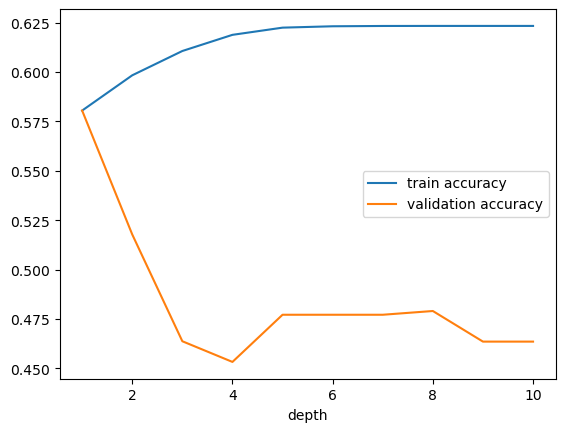

In [59]:
results.plot.line(x='depth', y=['train accuracy', 'validation accuracy'])

In [60]:
dtree_best = dtreeCV.best_estimator_

In [61]:
importances = dtree_best.feature_importances_
df_importances = pd.DataFrame()
df_importances['features'] = X_ohe.columns
df_importances['importances'] = importances
df_importances

,features,importances
0,Gender_F,1.0
1,Gender_M,0.0
2,Division_I,0.0
3,Division_II,0.0
4,Division_III,0.0
5,Season_19_20,0.0
6,Season_20_21,0.0
7,Season_21_22,0.0
8,Season_22_23,0.0
9,Season_23_24,0.0


## Decision Tree fixed at a depth

In [62]:
dtree1 = DecisionTreeClassifier(max_depth=10)

In [63]:
dtree1.fit(X_ohe, y)

DecisionTreeClassifier(max_depth=10)

In [64]:
accuracy = dtree1.score(X_ohe, y)
print('Accuracy: ', accuracy)

Accuracy:  0.5794714705953857


In [65]:
# dtree_string = export_text(dtree1, feature_names=list(X_ohe.columns), decimals=1, spacing=5)
# print(dtree_string)

In [66]:
importances = dtree1.feature_importances_
importances
df_feature_importances = pd.DataFrame()
df_feature_importances['Features'] = X_ohe.columns
df_feature_importances['importance'] = importances
df_feature_importances.sort_values('importance', ascending=False)

,Features,importance
1,Gender_M,0.840142
2,Division_I,0.060492
3,Division_II,0.044928
5,Season_19_20,0.017567
4,Division_III,0.015129
7,Season_21_22,0.012378
9,Season_23_24,0.004887
6,Season_20_21,0.003307
8,Season_22_23,0.001169
0,Gender_F,0.000000
